# August

## 25th

### (E) 234. Palindrome Linked List ★★

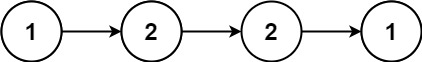

In [ ]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(2)
head.next.next.next = ListNode(1)

Follow up: Could you do it in O(n) time and O(1) space?

Not meeting follow up - 8 / 12

In [ ]:
from typing import Optional

class Solution:
    def isPalindrome(self, head: Optional[ListNode]) -> bool:
        cursor, res = head, ''

        while cursor != None:
          res += str(cursor.val)
          cursor = cursor.next
          
        return res == res[::-1]
      
Solution().isPalindrome(head)

True

Challenging backtracking - locate ```slow``` and ```fast``` at each the leftmost and the rightmost index and increment and decrement their index by 1 respectively until two meets at the middle.

The solution still does not meet the follow up in terms of space complexity.

In [ ]:
from typing import Optional

class Solution:
    def isPalindrome(self, head: Optional[ListNode]) -> bool:
      self.slow = fast = head
      self.flag = True

      def backtrack(fast):
        if fast == None:
          return
        backtrack(fast.next)

        if self.flag == True:
          if self.slow.val == fast.val:
            print(f"slow : {self.slow.val} / fast : {fast.val} <- match well")
            self.slow = self.slow.next
          else:
            self.flag = False
        else:
          return

      backtrack(fast)
      return self.flag

Solution().isPalindrome(head)

slow : 1 / fast : 1 <- match well
slow : 2 / fast : 2 <- match well
slow : 2 / fast : 2 <- match well
slow : 1 / fast : 1 <- match well


True

Awesome solution from [LeetCode discussion](https://leetcode.com/problems/palindrome-linked-list/discuss/64500/11-lines-12-with-restore-O(n)-time-O(1)-space) - checking reversed first half == second half.

In [ ]:
class Solution(object):
    def isPalindrome(self, head):
        rev = None
        slow = fast = head
        while fast and fast.next:
            fast = fast.next.next
            rev, rev.next, slow = slow, rev, slow.next
        if fast:
            slow = slow.next
        while rev and rev.val == slow.val:
            slow = slow.next
            rev = rev.next
        return not rev

### (E) 326. Power of Three

Follow up: Could you solve it without loops/recursion?

Not meeting follow up - 75 / 17

In [ ]:
class Solution:
    def isPowerOfThree(self, n: int) -> bool:
        if n < 1:
          return False
        elif n == 1:
          return True
        
        while n > 1:
          n /= 3

        return True if n == 1 else False

In [ ]:
Solution().isPowerOfThree(9)

True

Meeting follow up (I think this follow up is somewhat meaningless) - 100 / 100

In [ ]:
class Solution:
    def isPowerOfThree(self, n: int) -> bool:
        return n > 0 and 3**19 % n == 0

### (M) 75. Sort Colors ★

Merge sort using divide nd conquer - this is not that good solution since it's not taking some characteristics of the problem into consideration. - 17 / 15

In [ ]:
from typing import List
nums = [2,0,2,1,1,0, 9]

class Solution:
    def sortColors(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        def mergeSort(nums):
            if len(nums) > 1:

                r = len(nums)//2
                L = nums[:r]
                M = nums[r:]

                mergeSort(L)
                mergeSort(M)

                i = j = k = 0

                # Until we reach either end of either L or M, pick larger among
                # elements L and M and place them in the correct position at A[p..r]
                while i < len(L) and j < len(M):
                    if L[i] < M[j]:
                        nums[k] = L[i]
                        i += 1
                    else:
                        nums[k] = M[j]
                        j += 1
                    k += 1

                # When we run out of elements in either L or M,
                # pick up the remaining elements and put in A[p..r]
                while i < len(L):
                    nums[k] = L[i]
                    i += 1
                    k += 1

                while j < len(M):
                    nums[k] = M[j]
                    j += 1
                    k += 1
        
        mergeSort(nums)

Solution().sortColors(nums)

[0, 0, 1, 1, 2, 2, 9]


One-pass in-place solution from [LeetCode discussion](https://leetcode.com/problems/sort-colors/discuss/26481/Python-O(n)-1-pass-in-place-solution-with-explanation)

In [ ]:
def sortColors(self, nums):
    red, white, blue = 0, 0, len(nums)-1
    
    while white <= blue:
        if nums[white] == 0:
            nums[red], nums[white] = nums[white], nums[red]
            white += 1
            red += 1
        elif nums[white] == 1:
            white += 1
        else:
            nums[white], nums[blue] = nums[blue], nums[white]
            blue -= 1